# Problem 1.  

Build a denoising Dense autoencoder using Keras API. Create Train, Validate and Test sets of images. Demonstrate that noise is successfully removed by passing several images of handwritten digits: 1,2,5,9, and 4, with added noise. Choose those images from the Test set and not the Training dataset. You are expected to use images from the MNIST dataset. Please plot the original images, noisy images and reconstructed images. 
Experiment with several sizes of the middle (coding) layer. For example, use sizes: 64,32, 16, and 8 Compare qualities of output (reconstructed) images as a function of coding layer size. 
In each case, capture and present coding vectors for numbers 1,2,5,9, and 4 as rectangular images. Make qualitative and quantitative comparisons of the qualities of reconstructed images. Explain how you are doing it. Provide verbal description of those qualities and quantitative measures. Perhaps you want to place output (reconstructed) images of separate digits for different codings sizes one next to another. That would allow an easy visual comparison. Present the working code. 

In [ ]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [4]:
import pathlib

import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py
import glob
import time
from random import shuffle
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from IPython.display import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [7]:
#prepare MNIST train, test, and validate datasets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:] 
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [71]:
X_test.shape

(10000, 28, 28)

In [88]:
#get indices for specific lables
one_index = np.where(y_test==1)[0][0]
two_index = np.where(y_test==2)[0][0]
five_index = np.where(y_test==5)[0][0]
nine_index = np.where(y_test==9)[0][0]
four_index = np.where(y_test==4)[0][0]

indices = [one_index, two_index, five_index, nine_index, four_index]

[2, 1, 8, 7, 4]

In [ ]:
#define roundedaccuracy function to use as the metric of our convolutional autoencoder
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [35]:
# Function that introduces Gaussian noise , Change Sigma for level of noise

def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

In [50]:
X_train_noisy = apply_gaussian_noise(X_train)
X_valid_noisy = apply_gaussian_noise(X_valid)
X_test_noisy = apply_gaussian_noise(X_test)

In [48]:
#create denoising autoencoder with coding layer of size 64
tf.random.set_seed(42)
np.random.seed(42)

   
denoising_encoder1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(100, activation="selu", input_shape=[28* 28]), 
    keras.layers.Dense(64, activation="selu")])

denoising_decoder1 = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[64]), 
    keras.layers.Dense(28 * 28, activation="sigmoid"), 
    keras.layers.Reshape([28, 28])])

denoising_ae1 = keras.models.Sequential([denoising_encoder1, denoising_decoder1])

denoising_ae1.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=1.0),
    metrics=[rounded_accuracy])

In [49]:
#train model
history1 = denoising_ae1.fit(x=X_train_noisy, y=X_train, epochs=10,
                validation_data=[X_valid_noisy, X_valid])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1888 - rounded_accuracy: 0.9165 - val_loss: 0.1418 - val_rounded_accuracy: 0.9436
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1281 - rounded_accuracy: 0.9505 - val_loss: 0.1207 - val_rounded_accuracy: 0.9541
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1134 - rounded_accuracy: 0.9587 - val_loss: 0.1101 - val_rounded_accuracy: 0.9610
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1065 - rounded_accuracy: 0.9626 - val_loss: 0.1044 - val_rounded_accuracy: 0.9641
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1013 - rounded_accuracy: 0.9656 - val_loss: 0.1003 - val_rounded_accuracy: 0.9666
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0979 - rounded_accuracy: 0.9676 - val_loss: 0.0976 - val_rounded_accuracy: 0.9680
Epoch 7/10
1719/1719 [==================

In [51]:
#generate predictions on test data
preds1 = denoising_ae1.predict(X_test_noisy)

preds1 = preds1 * 255
xtest = X_test * 255

313/313 [==============================] - 1s 2ms/step


In [55]:
code.numpy().shape

(5, 64)

In [58]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

1/1 [==============================] - 0s 45ms/step


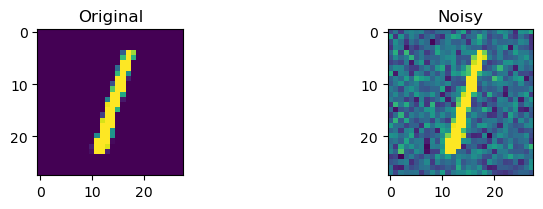

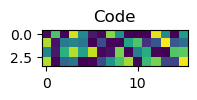

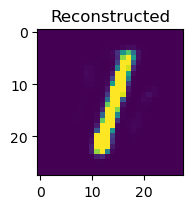

1/1 [==============================] - 0s 34ms/step


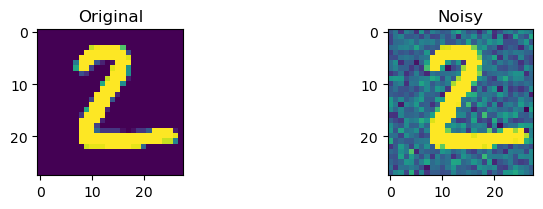

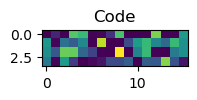

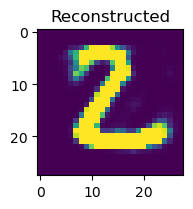

1/1 [==============================] - 0s 39ms/step


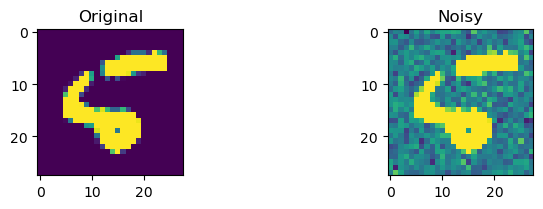

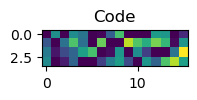

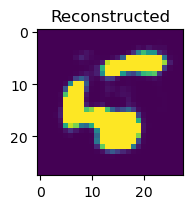

1/1 [==============================] - 0s 40ms/step


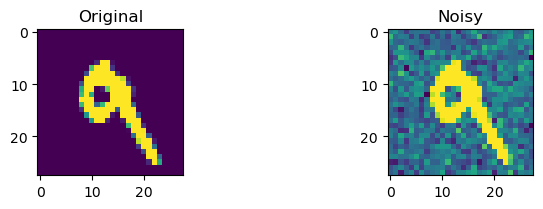

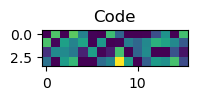

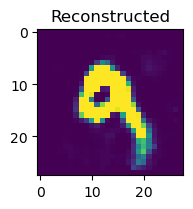

1/1 [==============================] - 0s 31ms/step


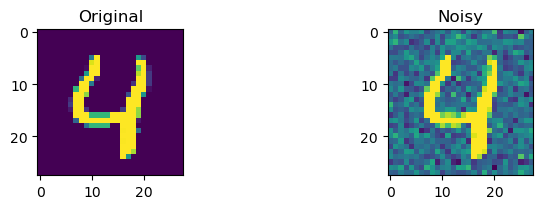

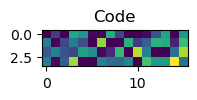

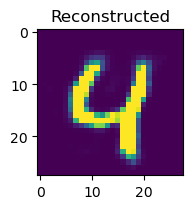

In [89]:
#visualize images for the dense denoising autoencoder with latent space of 64 dimensions

def visualize(img, encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    noisy = img + np.random.normal(loc=0.0, scale=.1, size=img.shape)

    # Original
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)
    

    #Noisy 
    plt.subplot(1,3,3)
    plt.title("Noisy")
    show_image(noisy)
    plt.show()
    
    #Coding
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape(4,16))
    plt.show()
    
    # Reconstructed 
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


#for specific handwritten digits, visualize the original, noisy, coding, and reconstructed images   
for value in indices:
    img = X_test[value]
    visualize(img, denoising_encoder1, denoising_decoder1)

In [90]:
#create denoising autoencoder with coding layer of size 32
tf.random.set_seed(42)
np.random.seed(42)

   
denoising_encoder2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(100, activation="selu", input_shape=[28* 28]), 
    keras.layers.Dense(32, activation="selu")])

denoising_decoder2 = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[32]), 
    keras.layers.Dense(28 * 28, activation="sigmoid"), 
    keras.layers.Reshape([28, 28])])

denoising_ae2 = keras.models.Sequential([denoising_encoder2, denoising_decoder2])

denoising_ae2.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=1.0),
    metrics=[rounded_accuracy])

In [91]:
#train model
history2 = denoising_ae2.fit(x=X_train_noisy, y=X_train, epochs=10,
                validation_data=[X_valid_noisy, X_valid])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1936 - rounded_accuracy: 0.9133 - val_loss: 0.1510 - val_rounded_accuracy: 0.9378
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1395 - rounded_accuracy: 0.9437 - val_loss: 0.1320 - val_rounded_accuracy: 0.9476
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1260 - rounded_accuracy: 0.9512 - val_loss: 0.1238 - val_rounded_accuracy: 0.9528
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1194 - rounded_accuracy: 0.9549 - val_loss: 0.1174 - val_rounded_accuracy: 0.9564
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1154 - rounded_accuracy: 0.9571 - val_loss: 0.1172 - val_rounded_accuracy: 0.9565
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1132 - rounded_accuracy: 0.9584 - val_loss: 0.1130 - val_rounded_accuracy: 0.9585
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 44ms/step


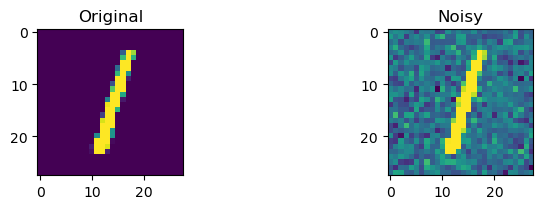

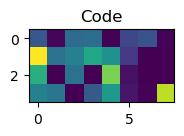

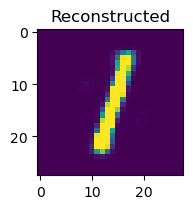

1/1 [==============================] - 0s 43ms/step


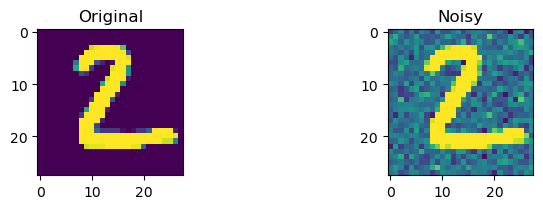

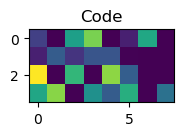

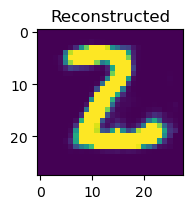

1/1 [==============================] - 0s 35ms/step


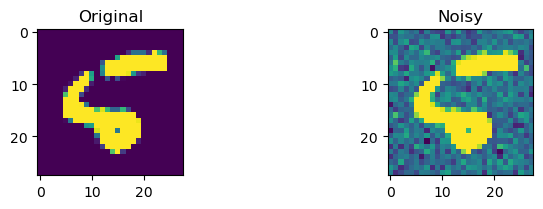

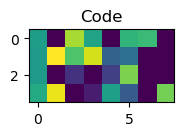

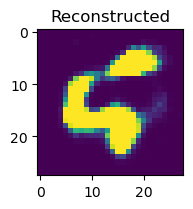

1/1 [==============================] - 0s 32ms/step


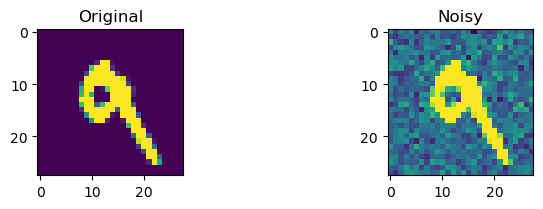

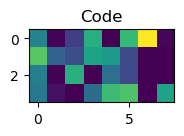

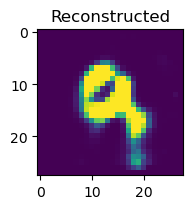

1/1 [==============================] - 0s 33ms/step


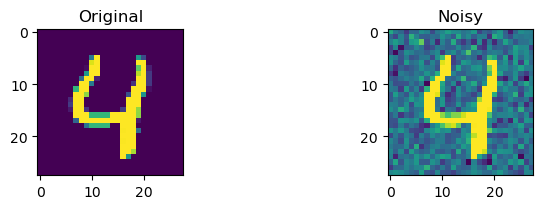

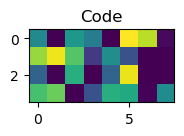

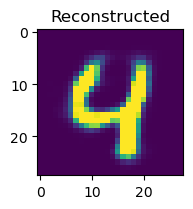

In [93]:
#visualize images for the dense denoising autoencoder with latent space of 32 dimensions
def visualize(img, encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    noisy = img + np.random.normal(loc=0.0, scale=.1, size=img.shape)

    # Original
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)
    

    #Noisy 
    plt.subplot(1,3,3)
    plt.title("Noisy")
    show_image(noisy)
    plt.show()
    
    #Coding
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape(4,8))
    plt.show()
    
    # Reconstructed 
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


#for specific handwritten digits, visualize the original, noisy, coding, and reconstructed images   
for value in indices:
    img = X_test[value]
    visualize(img, denoising_encoder2, denoising_decoder2)

In [97]:
#create denoising autoencoder with coding layer of size 16
tf.random.set_seed(42)
np.random.seed(42)

   
denoising_encoder4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(100, activation="selu", input_shape=[28* 28]), 
    keras.layers.Dense(16, activation="selu")])

denoising_decoder4 = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[16]), 
    keras.layers.Dense(28 * 28, activation="sigmoid"), 
    keras.layers.Reshape([28, 28])])

denoising_ae4 = keras.models.Sequential([denoising_encoder4, denoising_decoder4])

denoising_ae4.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=1.0),
    metrics=[rounded_accuracy])

In [98]:
#train model
history4 = denoising_ae4.fit(x=X_train_noisy, y=X_train, epochs=10,
                validation_data=[X_valid_noisy, X_valid])

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2079 - rounded_accuracy: 0.9041 - val_loss: 0.1664 - val_rounded_accuracy: 0.9281
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1586 - rounded_accuracy: 0.9320 - val_loss: 0.1537 - val_rounded_accuracy: 0.9347
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1509 - rounded_accuracy: 0.9362 - val_loss: 0.1480 - val_rounded_accuracy: 0.9381
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1460 - rounded_accuracy: 0.9389 - val_loss: 0.1451 - val_rounded_accuracy: 0.9400
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1426 - rounded_accuracy: 0.9408 - val_loss: 0.1425 - val_rounded_accuracy: 0.9414
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1401 - rounded_accuracy: 0.9423 - val_loss: 0.1391 - val_rounded_accuracy: 0.9424
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 103ms/step


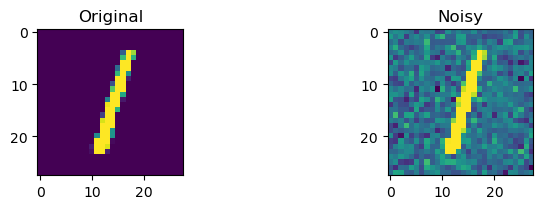

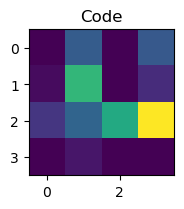

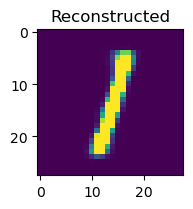

1/1 [==============================] - 0s 37ms/step


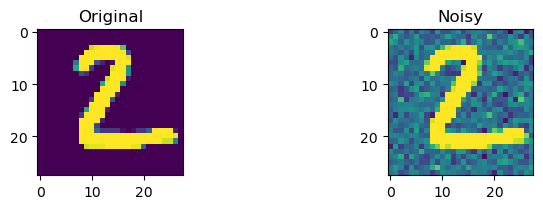

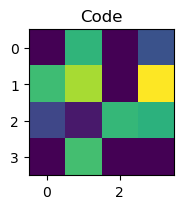

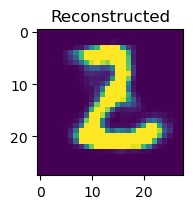

1/1 [==============================] - 0s 34ms/step


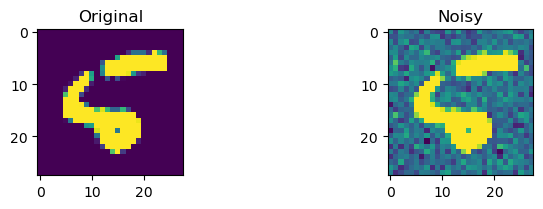

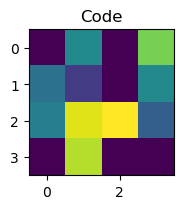

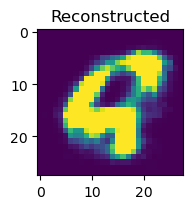

1/1 [==============================] - 0s 32ms/step


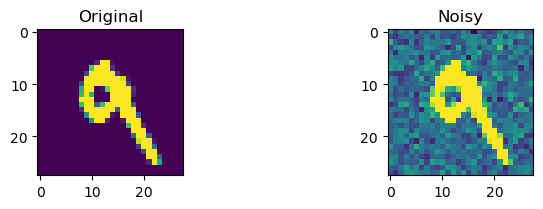

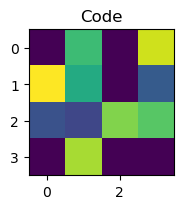

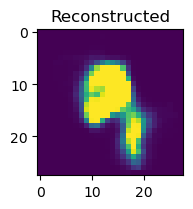

1/1 [==============================] - 0s 33ms/step


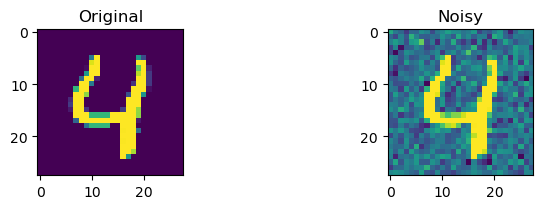

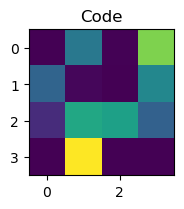

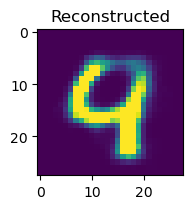

In [100]:
#visualize images for the dense denoising autoencoder with latent space of 16 dimensions
def visualize(img, encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    noisy = img + np.random.normal(loc=0.0, scale=.1, size=img.shape)

    # Original
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)
    

    #Noisy 
    plt.subplot(1,3,3)
    plt.title("Noisy")
    show_image(noisy)
    plt.show()
    
    #Coding
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape(4,4))
    plt.show()
    
    # Reconstructed 
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


#for specific handwritten digits, visualize the original, noisy, coding, and reconstructed images   
for value in indices:
    img = X_test[value]
    visualize(img, denoising_encoder4, denoising_decoder4)

In [94]:
#create denoising autoencoder with coding layer of size 8
tf.random.set_seed(42)
np.random.seed(42)

   
denoising_encoder3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(100, activation="selu", input_shape=[28* 28]), 
    keras.layers.Dense(8, activation="selu")])

denoising_decoder3 = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[8]), 
    keras.layers.Dense(28 * 28, activation="sigmoid"), 
    keras.layers.Reshape([28, 28])])

denoising_ae3 = keras.models.Sequential([denoising_encoder3, denoising_decoder3])

denoising_ae3.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=1.0),
    metrics=[rounded_accuracy])

In [95]:
#train model
history3 = denoising_ae3.fit(x=X_train_noisy, y=X_train, epochs=10,
                validation_data=[X_valid_noisy, X_valid])

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2388 - rounded_accuracy: 0.8862 - val_loss: 0.2178 - val_rounded_accuracy: 0.8966
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2110 - rounded_accuracy: 0.8975 - val_loss: 0.2058 - val_rounded_accuracy: 0.9002
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1983 - rounded_accuracy: 0.9055 - val_loss: 0.1882 - val_rounded_accuracy: 0.9134
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1791 - rounded_accuracy: 0.9187 - val_loss: 0.1697 - val_rounded_accuracy: 0.9248
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1677 - rounded_accuracy: 0.9254 - val_loss: 0.1649 - val_rounded_accuracy: 0.9272
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1636 - rounded_accuracy: 0.9277 - val_loss: 0.1622 - val_rounded_accuracy: 0.9282
Epoch 7/10
1719/1719 [==================

1/1 [==============================] - 0s 93ms/step


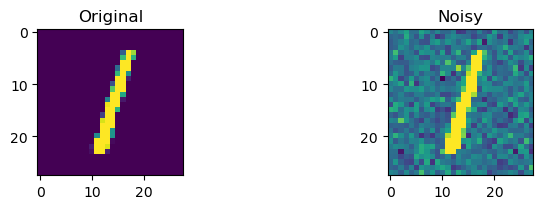

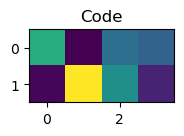

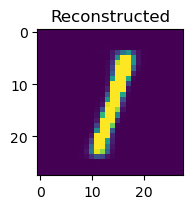

1/1 [==============================] - 0s 36ms/step


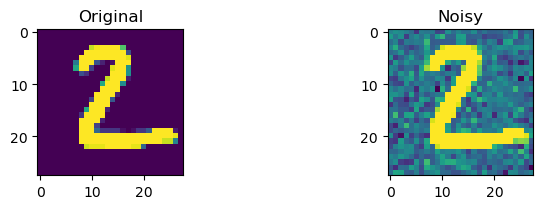

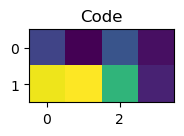

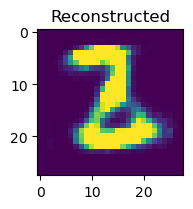

1/1 [==============================] - 0s 37ms/step


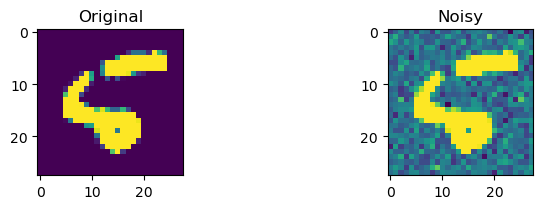

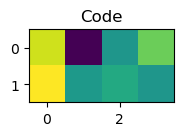

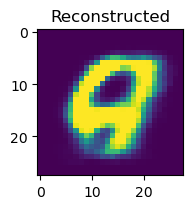

1/1 [==============================] - 0s 34ms/step


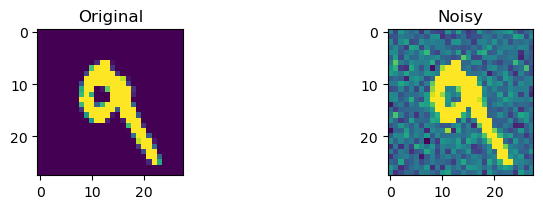

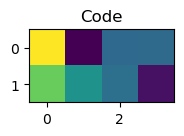

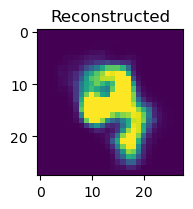

1/1 [==============================] - 0s 29ms/step


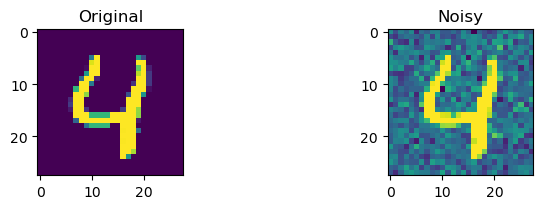

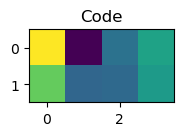

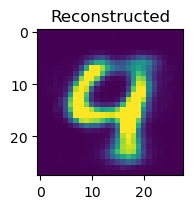

In [96]:
#visualize images for the dense denoising autoencoder with latent space of 8 dimensions

def visualize(img, encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    noisy = img + np.random.normal(loc=0.0, scale=.1, size=img.shape)

    # Original
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)
    

    #Noisy 
    plt.subplot(1,3,3)
    plt.title("Noisy")
    show_image(noisy)
    plt.show()
    
    #Coding
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape(2,4))
    plt.show()
    
    # Reconstructed 
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


#for specific handwritten digits, visualize the original, noisy, coding, and reconstructed images   
for value in indices:
    img = X_test[value]
    visualize(img, denoising_encoder3, denoising_decoder3)

1/1 [==============================] - 0s 39ms/step


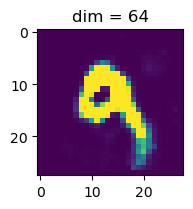

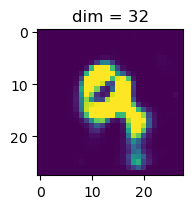

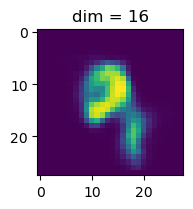

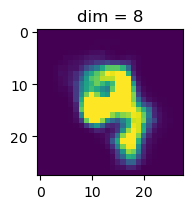

In [105]:
#comparing reconstructed images across the various denoising autoencoders with varying dimensionality

def visualize(img, a, b, c, d):
    """Draws original, encoded and decoded images"""
    noisy = img + np.random.normal(loc=0.0, scale=.1, size=img.shape)
    a = a.predict(img[None])[0]
    b = b.predict(img[None])[0]
    c = c.predict(img[None])[0]
    d = d.predict(img[None])[0]

    # 64 neurons
    plt.subplot(1,3,1)
    plt.title("dim = 64")
    show_image(a)
    plt.show()

    #32 neurons 
    plt.subplot(1,3,3)
    plt.title("dim = 32")
    show_image(b)
    plt.show()
    
    #16 neurons
    plt.subplot(1,3,2)
    plt.title("dim = 16")
    plt.imshow(c)
    plt.show()
    
    # 8 neurons 
    plt.subplot(1,3,3)
    plt.title("dim = 8")
    show_image(d)
    plt.show()


#for specific handwritten digits, visualize the original, noisy, coding, and reconstructed images   
index = indices[3]
img = X_test[index]
visualize(img, denoising_ae1, denoising_ae2, denoising_ae4, denoising_ae3)

As we see from the results above, we get the greatest validation accuracy and greatest reconstructed image quality from the model with 64 neurons in the coding layer (~97% val accuracy), compared with ~93% val accuracy in the model with only 8 neurons in the coding layer.  In the images themselves, we see an increasing fuzziness on the edges, as well as progressively declining ability to recognize the digit as we decrease neurons in the coding layer.  This pattern is more pronounced in numbers 6, and 9, and less pronounced for 1, likely a result of the smaller dimensional models being able to more easily replicate the simplistic pattern of the numeral 1, as compared with more complicated pattern of the numeral 9, as the simplistic pattern is easier to compress. 

# Problem 2

Use whichever codings size in the previous problem you discover is the best and create a new autoencoder with Conv2D and MaxPol2D layers rather than Dense layers. Compare the accuracy of the new model and the quality of reconstructed images for the digits 1,2,5,9, and 4 used in problem 1. Report your findings. This is based on Geron’s notebook for Chapter 17

In [111]:
#define convolutional denoising autoencoder
tf.random.set_seed(42)  
np.random.seed(42)

conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 14 × 14 x 16
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 7 × 7 x 32
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAvgPool2D()  # output: 64
])
conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same",
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28, 28])
])
conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="mse", optimizer="nadam", metrics=[rounded_accuracy])

In [112]:
# fit the model
history5 = conv_ae.fit(X_train_noisy, X_train, epochs=10,
                      validation_data=(X_valid_noisy, X_valid))

Epoch 1/10
1719/1719 [==============================] - 42s 23ms/step - loss: 0.0438 - rounded_accuracy: 0.9109 - val_loss: 0.0293 - val_rounded_accuracy: 0.9374
Epoch 2/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.0259 - rounded_accuracy: 0.9435 - val_loss: 0.0233 - val_rounded_accuracy: 0.9488
Epoch 3/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.0212 - rounded_accuracy: 0.9521 - val_loss: 0.0193 - val_rounded_accuracy: 0.9555
Epoch 4/10
1719/1719 [==============================] - 40s 24ms/step - loss: 0.0183 - rounded_accuracy: 0.9574 - val_loss: 0.0170 - val_rounded_accuracy: 0.9598
Epoch 5/10
1719/1719 [==============================] - 41s 24ms/step - loss: 0.0164 - rounded_accuracy: 0.9609 - val_loss: 0.0159 - val_rounded_accuracy: 0.9612
Epoch 6/10
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0151 - rounded_accuracy: 0.9631 - val_loss: 0.0144 - val_rounded_accuracy: 0.9644
Epoch 7/10
1719/1719 [======

1/1 [==============================] - 0s 28ms/step


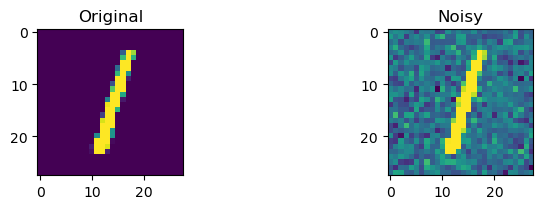

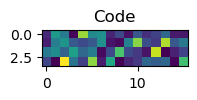

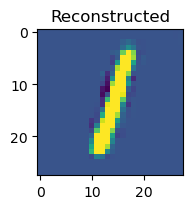

1/1 [==============================] - 0s 34ms/step


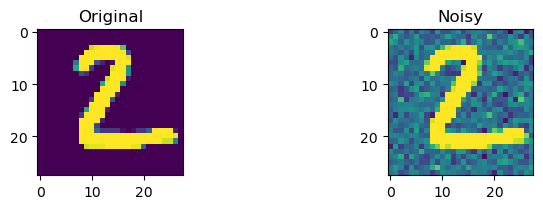

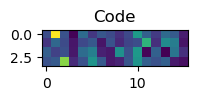

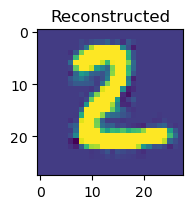

1/1 [==============================] - 0s 37ms/step


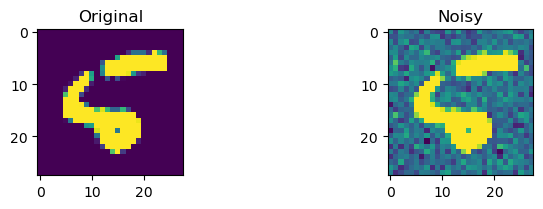

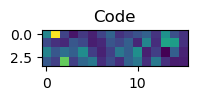

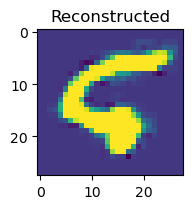

1/1 [==============================] - 0s 39ms/step


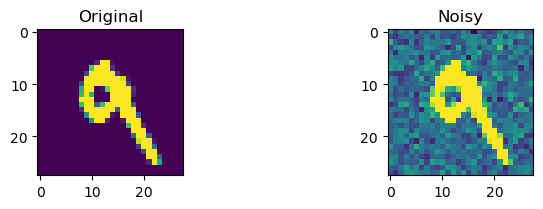

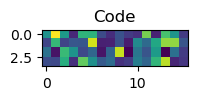

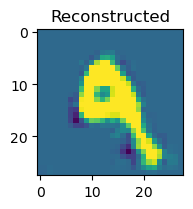

1/1 [==============================] - 0s 32ms/step


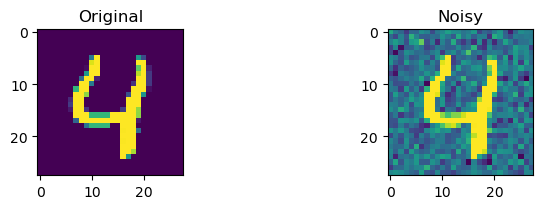

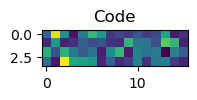

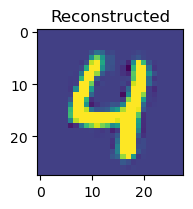

In [114]:
#visualize images for the convolutional denoising autoencoder with latent space of 64 dimensions
def visualize(img, encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    noisy = img + np.random.normal(loc=0.0, scale=.1, size=img.shape)

    # Original
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)
    

    #Noisy 
    plt.subplot(1,3,3)
    plt.title("Noisy")
    show_image(noisy)
    plt.show()
    
    #Coding
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape(4,16))
    plt.show()
    
    # Reconstructed 
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


#for specific handwritten digits, visualize the original, noisy, coding, and reconstructed images   
for value in indices:
    img = X_test[value]
    visualize(img, conv_encoder, conv_decoder)

1/1 [==============================] - 0s 38ms/step


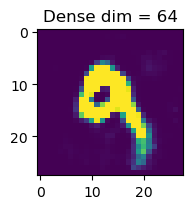

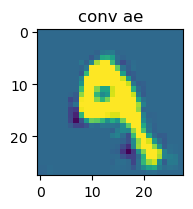

In [116]:
#comparing best dense autoencoder vs convolutional autoencoder

def visualize(img, a, b):
    """Draws original, encoded and decoded images"""
    noisy = img + np.random.normal(loc=0.0, scale=.1, size=img.shape)
    a = a.predict(img[None])[0]
    b = b.predict(img[None])[0]

    # 64 neurons
    plt.subplot(1,3,1)
    plt.title("Dense dim = 64")
    show_image(a)
    plt.show()
    
    #conv ae  
    plt.subplot(1,3,3)
    plt.title("conv ae")
    show_image(b)
    plt.show()


#for specific handwritten digits, visualize the original, noisy, coding, and reconstructed images   
index = indices[3]
img = X_test[index]
visualize(img, denoising_ae1, conv_ae)

As we see in the above results, the convolutional autoencoder achieves a validation accuracy similar to that of the best performing dense autoencoder of ~97%.  Qualitatively, however, the convolutional autoencoder appears to perform better than the dense network in that it appears to preserve more detail, clearer boundaries, and the full shape of the handwritten number than the dense network does. 

# Problem 3. 

Starting with the notebook: convolutional_variational_autoencoder.ipynb construct a Variational Autoencoders (VAE) using Conv2D and Conv2DTtranspose layers. Experiment with the latent space of dimension 2 and 8. Use the same Train, Validate and Test sets of images used in Problem 1. Train your VAEs for those two latent space dimensions. Once the training is done, take the same images of digits 1,2,5,9, and 4 used in the Problem 1. Find the outputs of trained VAEs with two different dimensions of the latent space for those images. Compare those outputs with the outputs obtained in the first problem by the autoencoder. We are just curious. Is one latent space “better” than the other? (25%)

In [120]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

### VAE Dim 2

In [134]:
#create VAE encoder with latent dimension of 2
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

In [135]:
import tensorflow as tf

#define latent space sampling function
class Sampler(layers.Layer):
    def call(self, z_mean, z_log_var):
        batch_size = tf.shape(z_mean)[0]
        z_size = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [136]:
#define decoder for VAE dim 2
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

In [137]:
#define custom class for VAE, metrics, training step 
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler(z_mean, z_log_var)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [138]:
import numpy as np

#import mnist dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 149s 272ms/step - total_loss: 214.9699 - reconstruction_loss: 212.6820 - kl_loss: 2.2878
Epoch 2/30
547/547 [==============================] - 146s 267ms/step - total_loss: 187.0660 - reconstruction_loss: 184.7271 - kl_loss: 2.3389
Epoch 3/30
547/547 [==============================] - 148s 271ms/step - total_loss: 183.4151 - reconstruction_loss: 181.1081 - kl_loss: 2.3071
Epoch 4/30
547/547 [==============================] - 146s 268ms/step - total_loss: 181.4512 - reconstruction_loss: 179.1205 - kl_loss: 2.3306
Epoch 5/30
547/547 [==============================] - 145s 266ms/step - total_loss: 179.7809 - reconstruction_loss: 177.4298 - kl_loss: 2.3511
Epoch 6/30
547/547 [==============================] - 146s 268ms/step - total_loss: 178.1691 - reconstruction_loss: 175.7848 - kl_loss: 2.3841
Epoch 7/30
547/547 [==============================] - 147s 269ms/step - total_loss: 176.8065 - reconstruction_loss: 174.3972 - kl_loss: 2.4094

In [147]:
# save VAE dimension 2 weights
vae.save_weights('./checkpoints/vae_2')

In [222]:
#create np array of specific digits from previous problems
test_sample = X_test[indices]

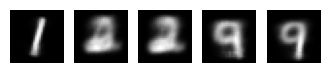

In [224]:
#plot reconstructions for VAE dim 2
mean, logvar = vae.encoder(test_sample)
z = vae.sampler(mean, logvar)
predictions_vae_2 = vae.decoder(z)

# Sample code to plot predictions, test_sample and compare your results
fig = plt.figure(figsize=(4, 4))

for i in range(predictions_vae_2.shape[0]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(predictions_vae_2[i, :, :, 0], cmap='gray')
    plt.axis('off')

### VAE dim 8

In [194]:
#create VAE with latent dimension of 8
latent_dim = 8

encoder_inputs1 = keras.Input(shape=(28, 28, 1))
x1 = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs1)
x1 = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(16, activation="relu")(x1)
z_mean1 = layers.Dense(latent_dim, name="z_mean")(x1)
z_log_var1 = layers.Dense(latent_dim, name="z_log_var")(x1)
encoder1 = keras.Model(encoder_inputs1, [z_mean1, z_log_var1], name="encoder")

In [195]:
latent_inputs1 = keras.Input(shape=(latent_dim))
x1 = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs1)
x1 = layers.Reshape((7, 7, 64))(x1)
x1 = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x1)
x1 = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x1)
decoder_outputs1 = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x1)
decoder1 = keras.Model(latent_inputs1, decoder_outputs1, name="decoder")

In [196]:
#update code for latent space dim 8
class Sampler(layers.Layer):
    def call(self, z_mean1, z_log_var1):
        batch_size = tf.shape(z_mean1)[0]
        z_size = tf.shape(z_mean1)[1]
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        return z_mean1 + tf.exp(0.5 * z_log_var1) * epsilon

In [197]:
#update code for latent space dim 8
class VAE(keras.Model):
    def __init__(self, encoder1, decoder1, **kwargs):
        super().__init__(**kwargs)
        self.encoder1 = encoder1
        self.decoder1 = decoder1
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean1, z_log_var1 = self.encoder1(data)
            z = self.sampler(z_mean1, z_log_var1)
            reconstruction = decoder1(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var1 - tf.square(z_mean1) - tf.exp(z_log_var1))
            total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [198]:
#instantiate and compile VAE 8
vae8 = VAE(encoder1, decoder1)
vae8.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)


In [199]:
#train VAE 8
vae8.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 148s 271ms/step - total_loss: 194.7746 - reconstruction_loss: 192.4416 - kl_loss: 2.3327
Epoch 2/30
547/547 [==============================] - 147s 269ms/step - total_loss: 137.5687 - reconstruction_loss: 134.3519 - kl_loss: 3.2168
Epoch 3/30
547/547 [==============================] - 154s 282ms/step - total_loss: 121.7385 - reconstruction_loss: 118.3760 - kl_loss: 3.3624
Epoch 4/30
547/547 [==============================] - 147s 269ms/step - total_loss: 117.9274 - reconstruction_loss: 114.5797 - kl_loss: 3.3476
Epoch 5/30
547/547 [==============================] - 147s 268ms/step - total_loss: 115.8876 - reconstruction_loss: 112.5414 - kl_loss: 3.3463
Epoch 6/30
547/547 [==============================] - 147s 268ms/step - total_loss: 114.4876 - reconstruction_loss: 111.1368 - kl_loss: 3.3508
Epoch 7/30
547/547 [==============================] - 147s 268ms/step - total_loss: 113.4336 - reconstruction_loss: 110.0959 - kl_loss: 3.3377

In [200]:
# save VAE dimension 8 weights
vae8.save_weights('./checkpoints/vae_8')

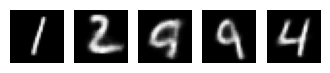

In [226]:
#plot reconstructions for VAE 8
mean, logvar = vae8.encoder1(test_sample)
z = vae8.sampler(mean, logvar)
predictions_vae_2 = vae8.decoder1(z)

# Sample code to plot predictions, test_sample and compare your results
fig = plt.figure(figsize=(4, 4))

for i in range(predictions_vae_2.shape[0]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(predictions_vae_2[i, :, :, 0], cmap='gray')
    plt.axis('off')

By inspection, we observe that the variational autoencoder with latent space of 8 produces better quality images than that of dimension 2. In the model of dimension 2, it is particularly difficult to recognize clearly the sample digits of 2,5,9,and 4. The better performance of the VAE8 was expected due to the higher dimensionality of the space.  Additionally we see that the higher dimensional model achieved a lower reconstruction loss during training than the 2 dimensional model (~103 vs ~166).  Furthermore, we see higher image quality from the standard autoencoders trained above 

# Problem 4

Use one of the VAEs from the previous problem. Choose the one you consider “better”. Tell us which criteria you used for the quality of the VAEs. Identify mean codings for four digits 1,2,5,9, and 4 from the test set. You could use the same images as in previous problems. Use the encoder portion of your VAE to generate the mean coding μ for all four digits (images). Imagine a “line” between coding vectors for images 2 and 5 and similarly images 1 and 4. On each of those two lines place 8 equally distant points. In the variational autoencoder the middle output (codings) has two components: the mean coding μ and the standard deviation σ. Use the mean codings of the same image of numbers 2 and number 5. Each is a 2 or 18 dimensional vector, call them a and b. You make a sequence of vectors with 8 intermediate values by generating vectors: a, a + (b-a)/9, a + 2*(b-a)/9,  a + 3*(b-a)/9,...., 8*(b-a)/9, b. For each of those, use the decoder to predict the reconstructed image. Use the decoder portion of your VAE to predict the images corresponding to those points. In that “prediction” include the boundary images 2 and 5 and 1 and 4 respectfully. 

In [ ]:
def plot_multiple_images(images, n_cols=None): 
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1 
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1) 
        plt.figure(figsize=(n_cols, n_rows)) 
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1) 
        plt.imshow(image, cmap="binary") 
        plt.axis("off")

codings for: [1 2 5 9 4]


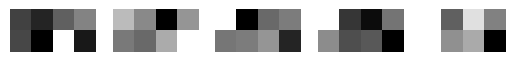

In [248]:
#display codings for sample digits from VAE 8
mean, logvar = vae8.encoder1(test_sample)
mean_codings = mean.numpy()
mean_codings_img = images.reshape(5, 2,4)

for i in range(mean_codings_img.shape[0]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(mean_codings_img[i, :], cmap='gray')
    plt.axis('off')
    
print("codings for:", y_test[indices])

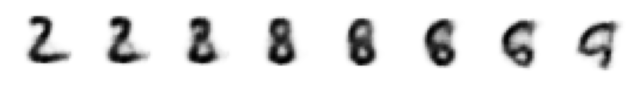

In [252]:
# show plot for VAE2 for digits 2-5 

a = mean_codings[1]
b = mean_codings[2]

n = 8
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

#obtain equally spaced points including endpoints a and b -- achieves the logic of a, a + (b-a)/9, a + 2*(b-a)/9,  a + 3*(b-a)/9,...., 8*(b-a)/9, b
points_2_5 = np.linspace(a, b, n)

#create predictions for each point
predictions_2_5 = vae8.decoder1(points_2_5)

# convert to numpy
predictions_2_5 = predictions_2_5.numpy()

# plot the images
plot_multiple_images(predictions_2_5, n_cols=n)

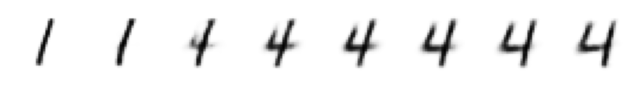

In [253]:
# show plot for VAE2 for digits 1-4 

a = mean_codings[0]
b = mean_codings[4]

n = 8
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

#obtain equally spaced points including endpoints a and b -- achieves the logic of a, a + (b-a)/9, a + 2*(b-a)/9,  a + 3*(b-a)/9,...., 8*(b-a)/9, b
points_1_4 = np.linspace(a, b, n)

#create predictions for each point
predictions_1_4 = vae8.decoder1(points_1_4)

# convert to numpy
predictions_1_4 = predictions_1_4.numpy()

# plot the images
plot_multiple_images(predictions_1_4, n_cols=n)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


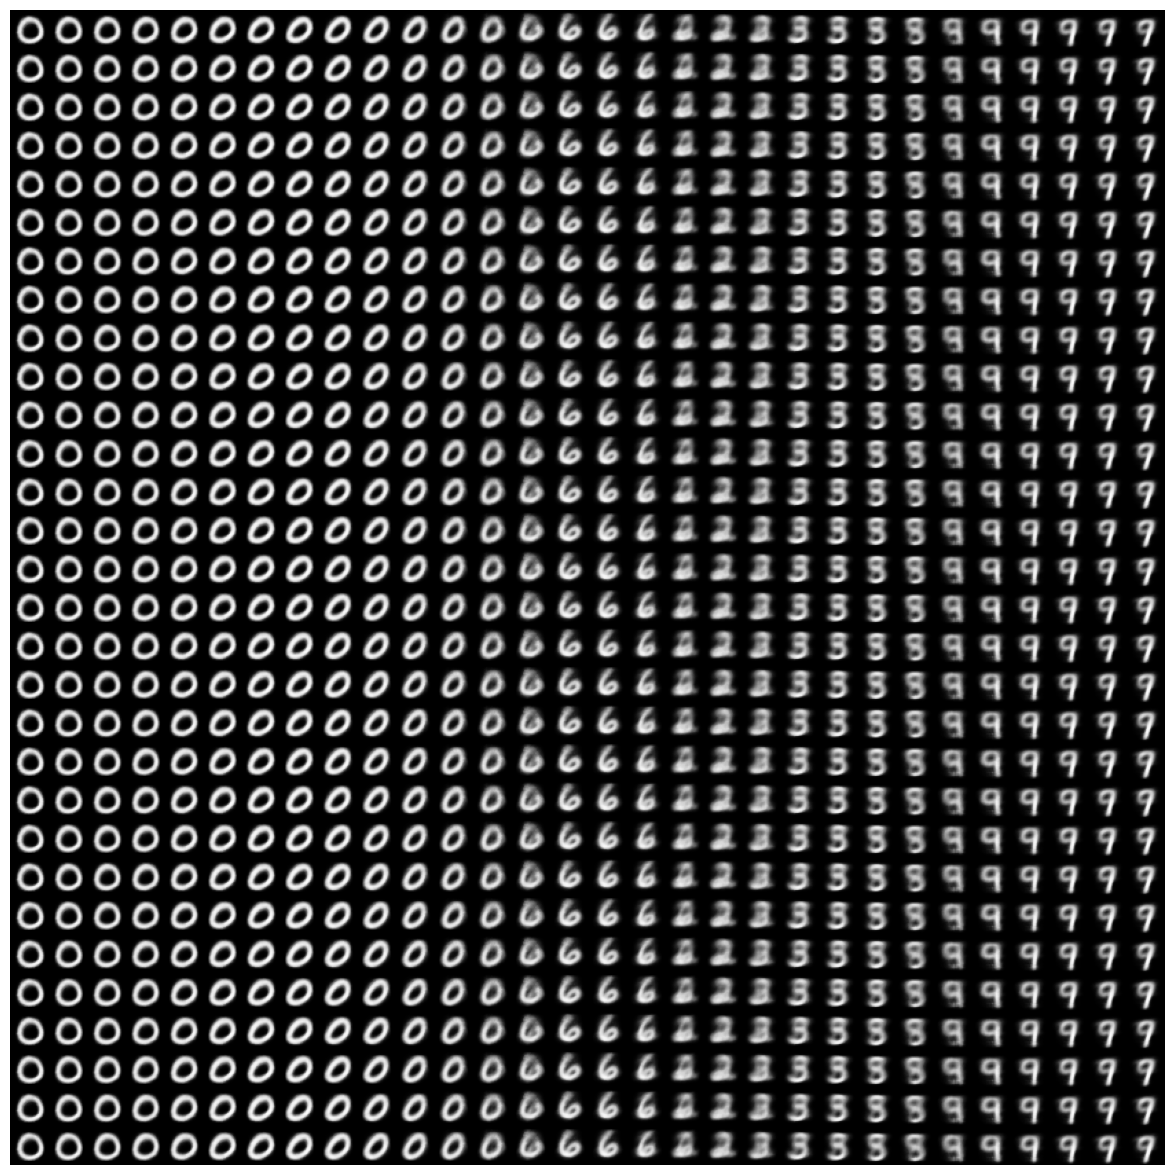

In [148]:
# show manifold plot for VAE2
import matplotlib.pyplot as plt

n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
        ] = digit

plt.figure(figsize=(15, 15))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.axis("off")
plt.imshow(figure, cmap="Greys_r")